In [7]:
import pickle

def l2norm(list1, list2):
    l2_norm_difference = sum((x - y) ** 2 for x, y in zip(list1, list2)) ** 0.5
    l2_norm_reference = sum(y**2 for y in list1) ** 0.5
    return l2_norm_difference / l2_norm_reference

data = {}
name = {"$lambda$-MR": "$\lambda$-MR", "Light Sampling": "IPSS", "Comb-Shapley": "MC-Shapley"}

model = "lstm_model"
for cnum in [3, 6, 10]:
    with open(f"/code/Shapley-Data-Valuation/sources/expres/{model}_{cnum}_sent140_same.res", "rb") as f:
        result = pickle.load(f)
    exact = result["Comb-Shapley"][0]
    data[cnum] = {}
    for alg, alg_result in result.items():
        data[cnum][name.get(alg, alg)] = (alg_result[1], l2norm(exact, alg_result[0]))

data

{3: {'MC-Shapley': (349.43918978236616, 0.0),
  'Perm-Shapley': (1520.277484498918, 8.382261179889876e-17),
  'Extended-TMC': (192.3794678170234, 1.2850677280682683),
  'OR': (50.08196206577122, 0.13538757096071377),
  '$\\lambda$-MR': (89.26786124892533, 1.0315721264802173),
  'Extended-GTB': (291.1727892216295, 3.2891099415134617),
  'DIG-FL': (195.12877475097775, 0.9330494612789347),
  'CC-Shapley': (193.07046804204583, 0.9935358923042428),
  'IPSS': (154.3104150313884, 0.056519336278786844),
  'GTG-Shapley': (169.01436716131866, 1.2674512895159566)},
 6: {'MC-Shapley': (2578.7460810393095, 0.0),
  'Perm-Shapley': (333737.6014521271, 2.951393586829654e-15),
  'Extended-TMC': (290.81471939757466, 2.0101876078258267),
  'OR': (814.1283459663391, 0.1899002502500878),
  '$\\lambda$-MR': (692.1676579173654, 0.9825518215099752),
  'Extended-GTB': (367.0243709012866, 6.180752039541585),
  'DIG-FL': (289.49979156814516, 0.9821347088428366),
  'CC-Shapley': (330.445863423869, 0.9458937005498

In [8]:
import matplotlib.pylab as plt

plt.style.use("ggplot")
plt.rcParams['axes.prop_cycle']
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.rm"] = "Times New Roman"

algs = ["Perm-Shapley", "MC-Shapley", "DIG-FL", "Extended-GTB", "CC-Shapley", "Extended-TMC", "GTG-Shapley", "OR", "$\lambda$-MR", "IPSS"]
colors = ["#FFFF00", "#8EBA42", "#8EBA42", "#FFB5B8", "#E24A33", "#348ABD", "#1F77b4", "#FF7F0E", "#2CA02C", "#D62728"]
hatchs = ["", "", "xx", "..", "//", "\\\\", "//", "**", "++", "oo"]

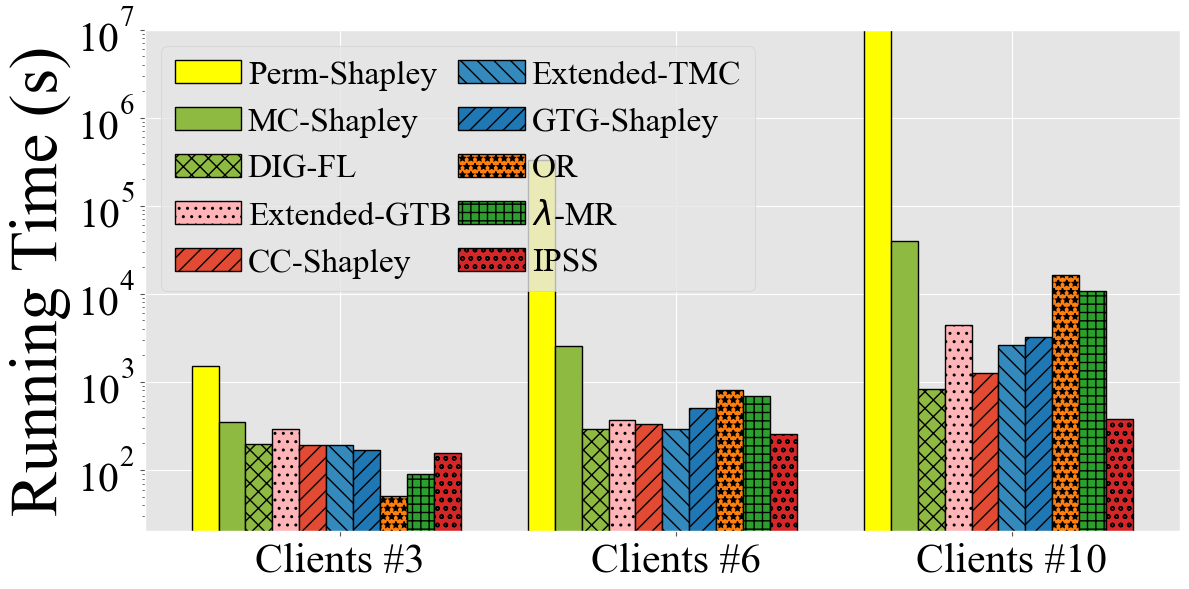

In [9]:
import numpy as np
import matplotlib.pyplot as plt

cnums = [3, 6, 10]
x = [0, 1, 2]
w = 0.08
index = [i for i in range(len(algs))]

fontsize = 30
plt.figure(figsize=(12, 6))

for k, cnum in enumerate(cnums):
    for i, idx in enumerate(index):
        alg, color, hatch = algs[idx], colors[idx], hatchs[idx]
        b = i - len(index) // 2
        plt.bar(x[k] + b * w, data[cnum][alg][0], width=w, label=alg if k == 0 else None, color=color, hatch=hatch, edgecolor="k", linewidth=1)

plt.yscale("log")
plt.ylim(top=1e7)
plt.ylabel("Running Time (s)", fontsize=fontsize * 1.6, color="black")
plt.xticks(x, [f"Clients #{cnum}" for cnum in cnums], fontsize=fontsize, color="black")
plt.yticks(fontsize=fontsize, color="black")
plt.legend(ncol=2, loc="upper left", fontsize=fontsize * 0.8, columnspacing=0.2, handletextpad=0.2, handlelength=2)

plt.tight_layout()
plt.show()

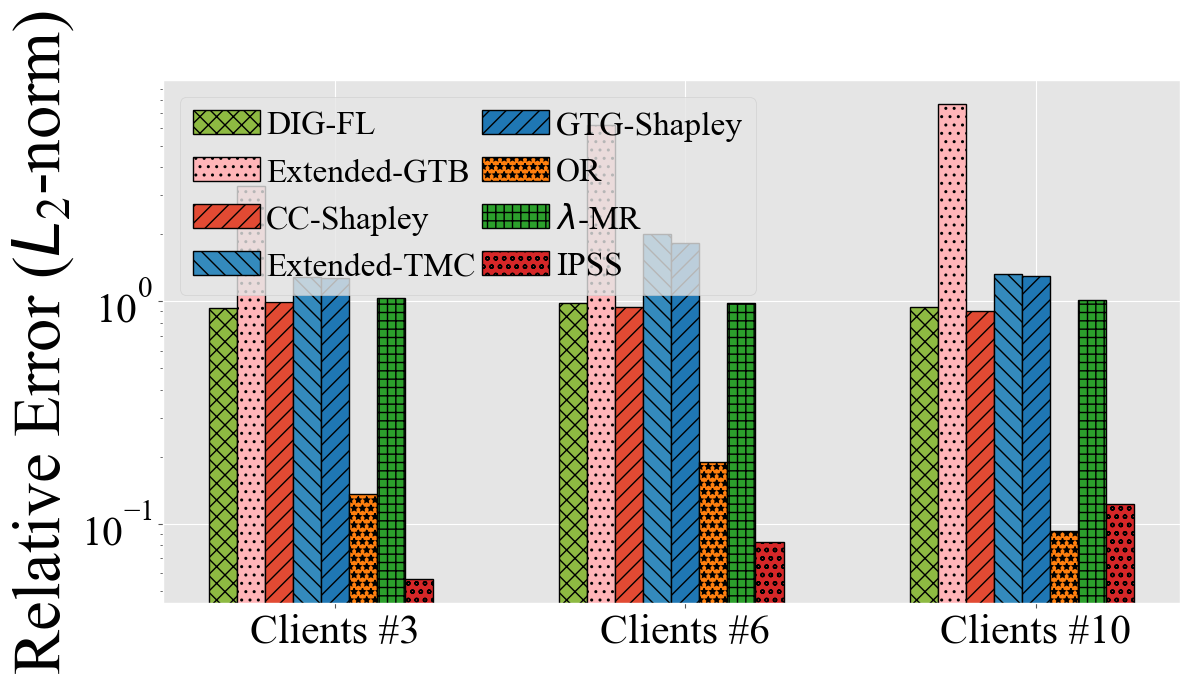

In [10]:
import numpy as np
import matplotlib.pyplot as plt

cnums = [3, 6, 10]
x = [0, 1, 2]
w = 0.08
index = [i for i in range(2, len(algs))]

fontsize = 30
plt.figure(figsize=(12, 6))

for k, cnum in enumerate(cnums):
    for i, idx in enumerate(index):
        alg, color, hatch = algs[idx], colors[idx], hatchs[idx]
        b = i - len(index) // 2
        plt.bar(x[k] + b * w, data[cnum][alg][1], width=w, label=alg if k == 0 else None, color=color, hatch=hatch, edgecolor="k", linewidth=1)

plt.yscale("log")
plt.ylabel("Relative Error ($L_{2}$-norm)", fontsize=fontsize * 1.6, color="black")
plt.xticks(x, [f"Clients #{cnum}" for cnum in cnums], fontsize=fontsize, color="black")
plt.yticks(fontsize=fontsize, color="black")
plt.legend(ncol=2, loc="upper left", fontsize=fontsize * 0.8, columnspacing=0.2, handletextpad=0.2, handlelength=2)

plt.tight_layout()
plt.show()